In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('C:/Users/79196/Projects/data/logs.csv')

In [3]:
df2 = pd.read_csv('C:/Users/79196/Projects/data/user_data.csv')

In [4]:
df1

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [5]:
df2

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [6]:
df1.nunique() 

client      4011
success        2
platform       3
time        4376
dtype: int64

In [7]:
#Какой клиент совершил больше всего успешных операций?
df1.query('success == 1') \
   .groupby('client') \
   .agg({'success':'count'}) \
   .sort_values(by=['success', 'client'], ascending=False) \
   .head(10) \
   .reset_index()

,client,success
0,92584,41
1,82563,41
2,78349,41
3,61473,41
4,61468,41
5,52870,41
6,36165,41
7,28719,41
8,12179,41
9,64064,40


**Ответ:**  92584, 82563, 78349, 61473, 61468, 52870, 36165, 28719, 12179

In [8]:
#С какой платформы осуществляется наибольшее количество успешных операций?
df1.query('success == True') \
   .groupby('platform') \
   .agg({'success': 'count'}) \
   .sort_values('success', ascending=False) \
   .reset_index()

,platform,success
0,phone,2019
1,computer,1090
2,tablet,180


**Ответ:** phone = 2019

In [9]:
#Какая платформа наиболее популярна среди премиумных клиентов?
p = df1.merge(df2, how='inner', on='client') \
   .query('premium == True') \
   .groupby('platform') \
   .agg({'premium':'count'}) \
   .sort_values('premium', ascending=False) \
   .reset_index()
p

,platform,premium
0,phone,246
1,computer,150
2,tablet,24


**Ответ:** phone = 246

C:\Users\79196\AppData\Local\Temp\ipykernel_11796\3009966794.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.query('premium == True').age)
C:\Users\79196\AppData\Local\Temp\ipykernel_11796\3009966794.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.query('premium == False').age)


<Axes: xlabel='age', ylabel='Density'>

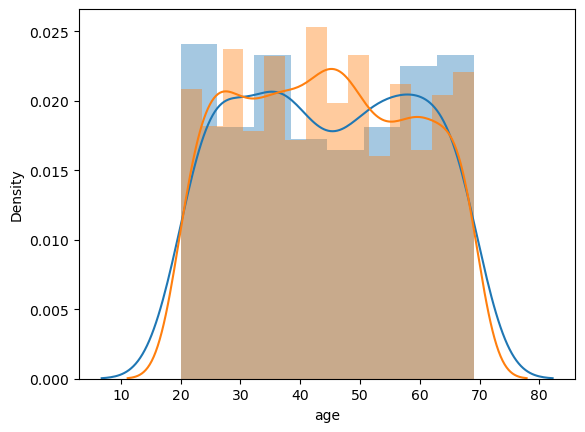

In [10]:
#Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
sns.distplot(df2.query('premium == True').age)
sns.distplot(df2.query('premium == False').age)

In [11]:
sourse_true_success = df1.query('success==True and platform == "computer"') \
                         .groupby('client') \
                         .agg({'success':'sum'}) 
sourse_true_success

,success
client,
164,1
315,1
405,1
502,1
946,1
...,...
99592,1
99636,1
99864,1


In [12]:
p = sourse_true_success.merge(df2, how='left', on='client')
p
#sns.countplot(data=p, x='age', y='success') -- разобраться с графиком

,client,success,premium,age
0,164,1,False,37.0
1,315,1,NaN,NaN
2,405,1,False,37.0
3,502,1,NaN,NaN
4,946,1,NaN,NaN
...,...,...,...,...
960,99592,1,False,35.0
961,99636,1,False,44.0
962,99864,1,False,26.0
963,99868,1,False,39.0
